In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv("/home/mave/torch-env/PROJECT 1/insurance.csv")

print(file.head())

print(file.info())

print(file.describe())

above = file[file['age'] > 35]

print(above)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

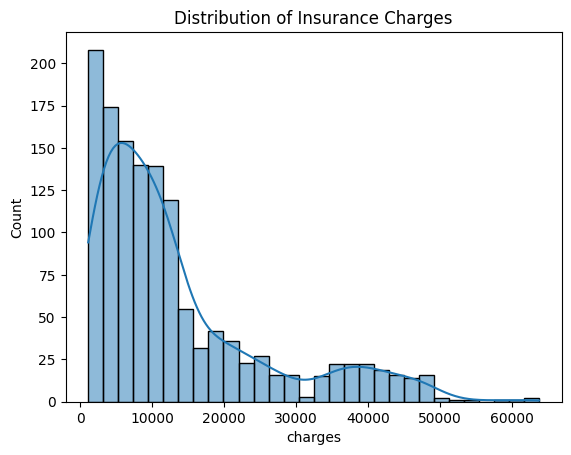

In [3]:
sns.histplot(file['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.show()

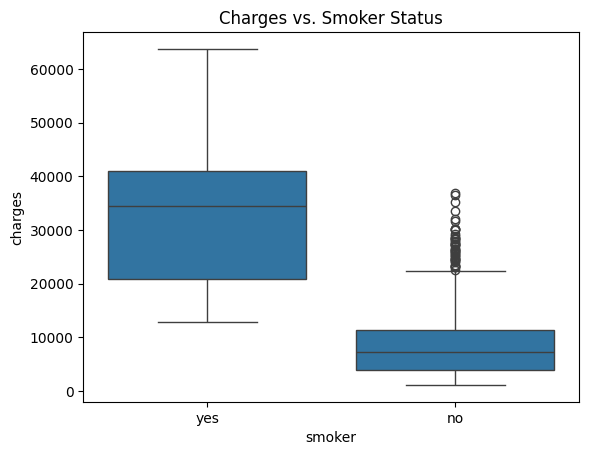

In [4]:

sns.boxplot(x='smoker', y='charges', data=file)
plt.title('Charges vs. Smoker Status')
plt.show()

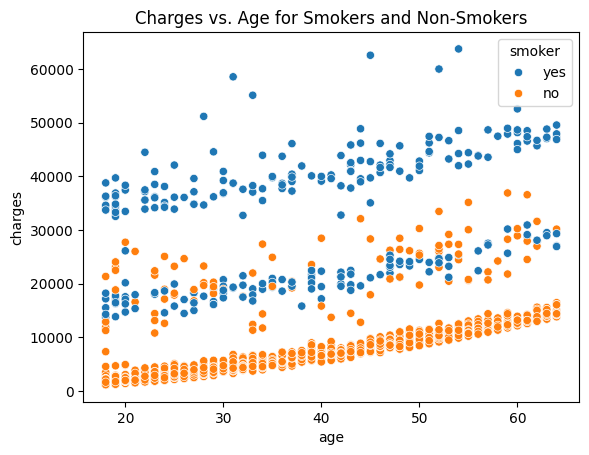

In [5]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=file)
plt.title('Charges vs. Age for Smokers and Non-Smokers')
plt.show()

In [ ]:

df_processed = file.copy()


df_processed = pd.get_dummies(df_processed, columns=['sex', 'smoker', 'region'], drop_first=True)


print(df_processed.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [7]:
X = df_processed.drop('charges', axis=1)
y = df_processed['charges']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

# Create the model instance
lr_model = LinearRegression()

# Fit the model to your training data
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pre = lr_model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.2f}")

Root Mean Squared Error (RMSE): $5796.28
R-squared (R2): 0.78
